Esse exercício iremos consumir dados da API do mercado livre. Busca produtos relacionados a celulares.

In [1]:
# Importadando as bibliotecas
import requests # biblioteca para realizar Requisições na API
import pandas as pd # Importando a biblioteca pandas
import matplotlib.pyplot as plt # Importadando a matprotlib para gráficos.
from IPython.display import display # Para exibir a tabela de forma mais organizada

In [3]:
# 1. Leitura de Dados da API do Mercado Livre

url = "https://api.mercadolibre.com/sites/MLB/search?q=celular" #API de busca de celulares
response = requests.get(url)
data = response.json() # Lendo os dados de formato JSON

# 2. Carregar os dados em um DataFrame
df = pd.json_normalize(data['results']) # Retornando o resultado da API
display(df.head(1000))

,code,message
0,unauthorized,authorization value not present


In [ ]:
# 3. Transformação de dados
# Renomeando colunas para facilitar o entendimento

df.rename(columns={
        'id': 'id_produto',
        'title': 'título',
        'price': 'preço',
        'currency_id': 'moeda',
        'available_quantity': 'quantidade_disponível',
        'condition': 'condição',
        'thumbnail': 'imagem',
        'category_id': 'id_categoria',
        'installments': 'parcelas'


}, inplace=True)

df

In [ ]:
# 4. Filtrando dados
df_filtrado = df[df['preço'] <2000]
df_filtrado

,id_produto,título,condição,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,...,installments.currency_id,installments.metadata.meliplus_installments,installments.metadata.additional_bank_interest,sale_price.metadata.discount_meli_amount,sale_price.metadata.experiment_id,sale_price.metadata.variation,sale_price.metadata.campaign_discount_percentage,sale_price.metadata.funding_mode,sale_price.metadata.order_item_price,sale_price.metadata.campaign_end_date
0,MLB3851709413,Smartphone Samsung Galaxy A06 4g 128gb 4gb Ram...,new,798448-MLU78740857142_092024,MLB40304330,gold_pro,,https://www.mercadolivre.com.br/smartphone-sam...,buy_it_now,MLB,...,BRL,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLB4147865118,Smartphone Motorola Moto G84 5g - 256gb 16gb (...,new,772318-MLA74676487148_022024,MLB27281402,gold_pro,,https://www.mercadolivre.com.br/smartphone-mot...,buy_it_now,MLB,...,BRL,False,False,102.80,cm_med_uplift_P-MLB14603402,74365,20.00,sale_fee,1469.00,2025-03-01T02:00:00Z
2,MLB3589269609,Samsung Galaxy A15 4g Dual Sim 128 Gb Azul-esc...,new,668543-MLA75547177771_042024,MLB32175033,gold_pro,,https://www.mercadolivre.com.br/samsung-galaxy...,buy_it_now,MLB,...,BRL,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLB3683576875,Smartphone Motorola Moto G04s - 128gb 8gb (4gb...,new,822441-MLU75950846226_052024,MLB36337426,gold_pro,,https://www.mercadolivre.com.br/smartphone-mot...,buy_it_now,MLB,...,BRL,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLB4484609574,Smartphone Motorola Moto G34 5g - 128gb 8gb (4...,new,925482-MLA81822892666_012025,MLB29736241,gold_pro,,https://www.mercadolivre.com.br/smartphone-mot...,buy_it_now,MLB,...,BRL,False,False,27.71,NaN,NaN,25.22,sale_fee,821.87,2025-02-24T20:21:49Z
5,MLB3932141553,Samsung Galaxy A25 5g Dual Sim 128gb Azul Escu...,new,816751-MLU77379807127_072024,MLB34103803,gold_pro,,https://www.mercadolivre.com.br/samsung-galaxy...,buy_it_now,MLB,...,BRL,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MLB5247332096,Samsung Galaxy M55 5g Dual Sim 256 Gb Azul Esc...,new,651977-MLA76009505043_042024,MLB36208238,gold_pro,,https://www.mercadolivre.com.br/samsung-galaxy...,buy_it_now,MLB,...,BRL,False,False,89.34,cm_med_uplift_P-MLB14603402,74365,43.71,sale_fee,1489.00,2025-03-01T02:59:59Z
8,MLB3817306339,Smartphone Moto G85 5g - 256gb 16gb Ram Boost ...,new,998515-MLU77871522886_072024,MLB38621285,gold_pro,,https://www.mercadolivre.com.br/smartphone-mot...,buy_it_now,MLB,...,BRL,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,MLB3709328469,"Samsung Galaxy M35 5g , Câmera Tripla Até 50mp...",new,884247-MLU76600224467_052024,MLB37105503,gold_pro,,https://www.mercadolivre.com.br/samsung-galaxy...,buy_it_now,MLB,...,BRL,False,False,74.10,cm_med_uplift_P-MLB14603402,74365,4.94,sale_fee,1424.90,2025-02-24T02:50:00Z
14,MLB3967008529,"Celular Samsung Galaxy A16, 128gb + 4gb Ram, C...",new,788465-MLA80780261870_112024,MLB44372580,gold_pro,,https://www.mercadolivre.com.br/celular-samsun...,buy_it_now,MLB,...,BRL,False,False,46.76,cm_med_uplift_P-MLB14603402,74365,22.01,sale_fee,1169.00,2025-03-01T02:00:00Z


In [ ]:
# 5. Análise Descritiva
estatisticas_precos = df_filtrado['preço'].describe()
estatisticas_precos

,preço
count,32.000000
mean,1078.718750
std,449.779936
min,129.900000
25%,779.500000
50%,1124.000000
75%,1449.882500
max,1856.000000


In [ ]:
# 6. Contagem de produtos por categorias
contagem_categorias = df_filtrado['listing_type_id'].value_counts() # contando os registros
contagem_categorias

,count
listing_type_id,
gold_pro,22
gold_special,10


In [ ]:
# 7. Tabela com todas as colunas renomeadas

tabela_produtos = df[['título', 'preço', 'quantidade_disponível', 'condição', 'id_categoria', 'moeda', 'imagem']]

display(tabela_produtos)

,título,preço,quantidade_disponível,condição,id_categoria,moeda,imagem
0,Smartphone Samsung Galaxy A06 4g 128gb 4gb Ram...,721.00,500,new,MLB1055,BRL,http://http2.mlstatic.com/D_798448-MLU78740857...
1,Smartphone Motorola Moto G84 5g - 256gb 16gb (...,1469.00,500,new,MLB1055,BRL,http://http2.mlstatic.com/D_772318-MLA74676487...
2,Samsung Galaxy A15 4g Dual Sim 128 Gb Azul-esc...,958.17,5000,new,MLB1055,BRL,http://http2.mlstatic.com/D_668543-MLA75547177...
3,Smartphone Motorola Moto G04s - 128gb 8gb (4gb...,687.00,5000,new,MLB1055,BRL,http://http2.mlstatic.com/D_822441-MLU75950846...
4,Smartphone Motorola Moto G34 5g - 128gb 8gb (4...,821.87,250,new,MLB1055,BRL,http://http2.mlstatic.com/D_925482-MLA81822892...
5,Samsung Galaxy A25 5g Dual Sim 128gb Azul Escu...,1299.00,5000,new,MLB1055,BRL,http://http2.mlstatic.com/D_816751-MLU77379807...
6,Samsung Galaxy M55 5g Dual Sim 256 Gb Azul Esc...,1489.00,500,new,MLB1055,BRL,http://http2.mlstatic.com/D_651977-MLA76009505...
7,Samsung Galaxy S24 Galaxy Ai 256gb Preto 8gb Ram,4099.00,1,new,MLB1055,BRL,http://http2.mlstatic.com/D_802035-MLU75861211...
8,Smartphone Moto G85 5g - 256gb 16gb Ram Boost ...,1699.00,500,new,MLB1055,BRL,http://http2.mlstatic.com/D_998515-MLU77871522...
9,Smartphone Samsung Galaxy A55 5g 256gb 8gb Ram...,2390.00,1,new,MLB1055,BRL,http://http2.mlstatic.com/D_899271-MLU79170039...


<function matplotlib.pyplot.show(close=None, block=None)>

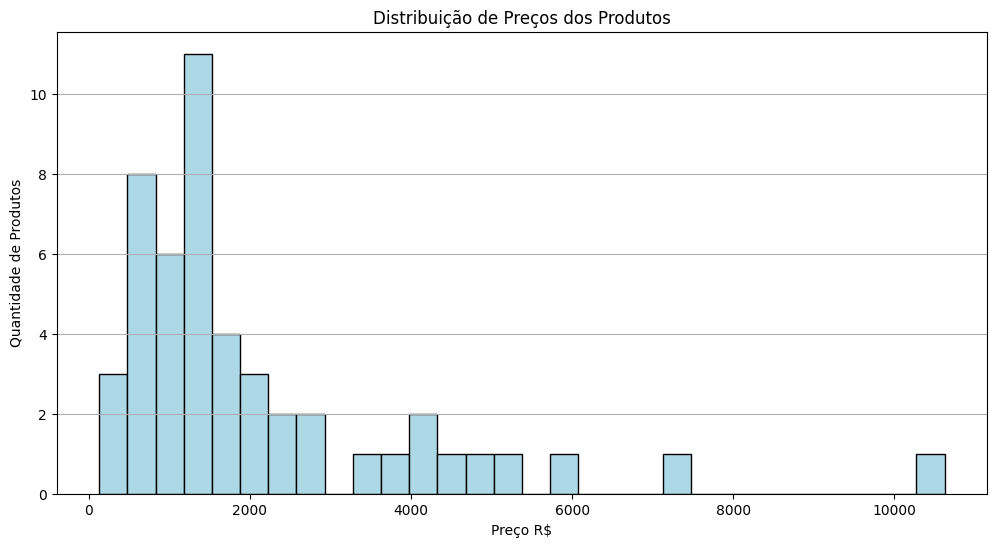

In [ ]:
# 8. Visualizações dos dados
# Gráfico de Preços dos Produtos

plt.figure(figsize=(12,6))
plt.hist(df['preço'], bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço R$')
plt.ylabel('Quantidade de Produtos')
plt.grid(axis= 'y')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

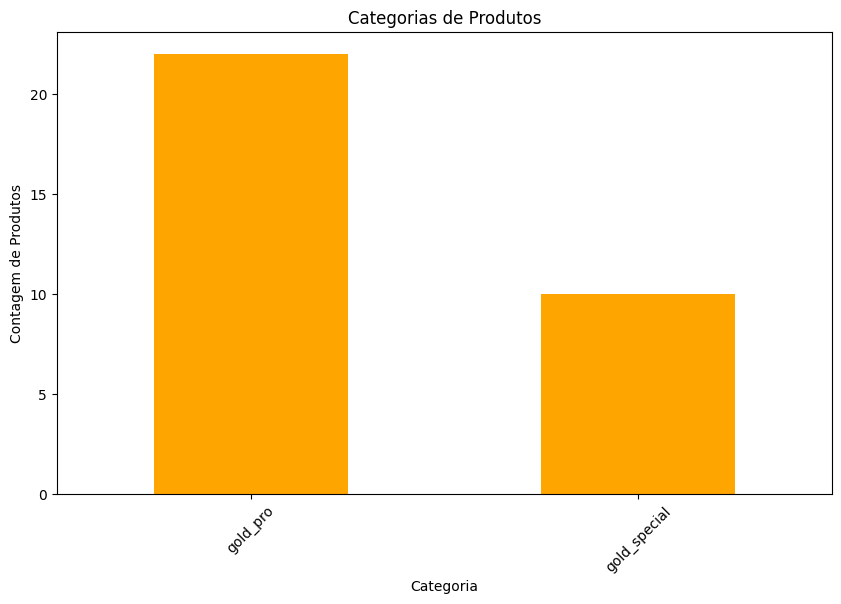

In [ ]:
# 9. Gráfico de Produtos por Categoria
plt.figure(figsize=(10,6))
contagem_categorias.plot(kind = 'bar', color='orange')
plt.title('Categorias de Produtos')
plt.xlabel('Categoria')
plt.ylabel('Contagem de Produtos')
plt.xticks(rotation = 45)
plt.show

In [ ]:
# 10. Adicionando mais análises
# Análise de categorias e preços médios

media_precos_por_categoria = df.groupby('listing_type_id')['preço'].mean().sort_values(ascending = False)
print('Média de preços por Categoria')
media_precos_por_categoria

Média de preços por Categoria


,preço
listing_type_id,
gold_pro,2399.173714
gold_special,1488.032857


In [ ]:
# Exportando para excel
tabela_produtos.to_excel('Produtos_mercado_livre.xlsx', index = False)